In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib nbagg
import glob as glob

import imp
qs = imp.load_source('quicksilver', '/home/adam/Code/quicksilver/quicksilver.py')
#reso = imp.load_source('resonances', '/home/adam/Code/resonances/reso.py')

`quicksilver` is my code that includes tools for analyzing orbits and calculating resonance widths of planets around binaries. You shouldn't need to edit anything within that code. Just some tools are used to help in this code. For example given a secondary mass of KIC... you can calculate the SMA of the planet and the binary.

In [22]:
a_bin = qs.sma(1.04,0.95,19.39)
print a_bin, qs.mod_a_from_n(1.04,0.95,a_bin,2*np.pi/260)

0.177665845471 1.00473540458


Open `tides.py`

Uncomment:

```python
# multiprocessing for all 
pool = mp.Pool(processes=numcpu)
pool.map(run_dual, rows)
```

This will read a csv file with the Kepler results and ouput the tidal evolution for all systems. Changing `ftide` (line 103) to your required value.

Run tides.py

Plot the results with the code below:

<IPython.core.display.Javascript object>


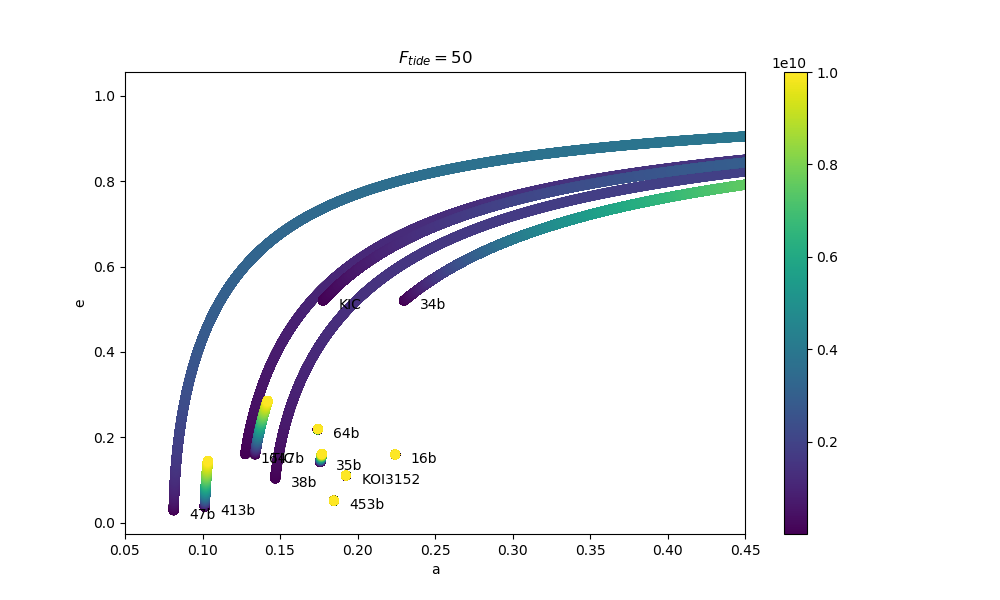

In [41]:
ftide = 50

csv = pd.read_csv("/home/adam/Code/BinaryTidalEvolution/kepler_data.csv",delim_whitespace=True)
csv = csv[(csv.Name != "47d")&(csv.Name != "47c")]
plt.figure(figsize=(10,6))
for index, row in csv.iterrows():
    df = pd.read_pickle("/home/adam/Projects/tidal/f"+str(ftide)+"/"+row['Name']+".p")
    plt.scatter(df.a,df.e,c=df.t,label=row['Name'])
    plt.text(df.a[0]+0.01,df.e[0]-0.02,row['Name'])
    #plt.plot(df.a[df.chaos>2],df.e[df.chaos>2],"r.",label="")
    #plt.clim(cmin,cmax)
#plt.legend(loc="best")
plt.title("$F_{tide}="+str(ftide)+"$")
plt.ylabel("e")
plt.xlabel("a")
plt.xlim(0.05,.45)
plt.colorbar()
plt.show()

Now open `chaos_check.py` to calculate where the planets are in the N:1. 

Specify `ftide` and `baseline`. Within `check_p_fast` set the planet eccentricity, `ep`, for the resonant widths. Set to the planet's current day eccentricity, the secular eccentricity, or a manual value. Change `df["chaos_ep"]` to some else like `df["chaos_05"]` to track other eccentricites.

<IPython.core.display.Javascript object>


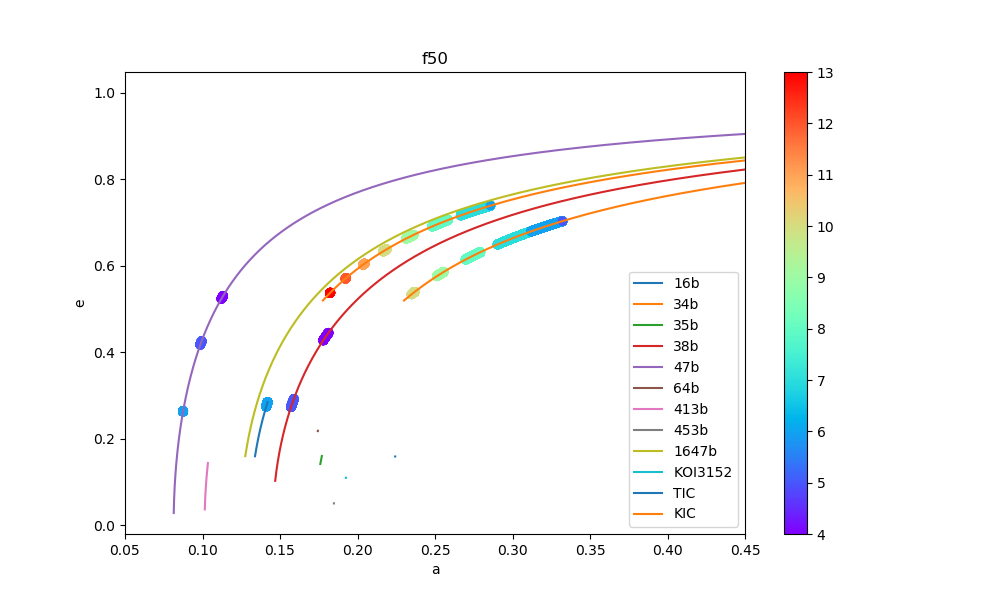

/home/adam/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [45]:
plt.figure(figsize=(10,6))
ftide = "f50"

cmin, cmax = 4, 13

for index, row in csv.iterrows():
    df = pd.read_pickle("/home/adam/Projects/tidal/"+ftide+"/"+row['Name']+".p")
    #df.chaos = df.chaos_05
    df.chaos = df.chaos_ep
    plt.plot(df.a,df.e,label=row['Name'])
    plt.scatter(df.a[df.chaos>2],df.e[df.chaos>2],c=df.chaos[df.chaos>2],label="",cmap="rainbow")
    plt.clim(cmin,cmax)
    
plt.title(ftide)
plt.legend(loc="best")
plt.ylabel("e")
plt.xlabel("a")
plt.xlim(0.05,.45)
plt.colorbar()
plt.show()

Now to make the tracks with radius evolution:

Open `tides.py`

comment:

```python
# multiprocessing for all 
pool = mp.Pool(processes=numcpu)
pool.map(run_dual, rows)
```

uncomment:

```python
#limit csv to just values with radius evolution:
csv = csv[(csv.Name == "34b") |  (csv.Name == "38b") | (csv.Name == "47b") | (csv.Name == "KIC")]
rows = [row for index, row in csv.iterrows()]

pool = mp.Pool(processes=numcpu)
pool.map(run_dual_R_evo, rows)
```

run `tides.py`

Optional: rerun `chaos_check

<IPython.core.display.Javascript object>


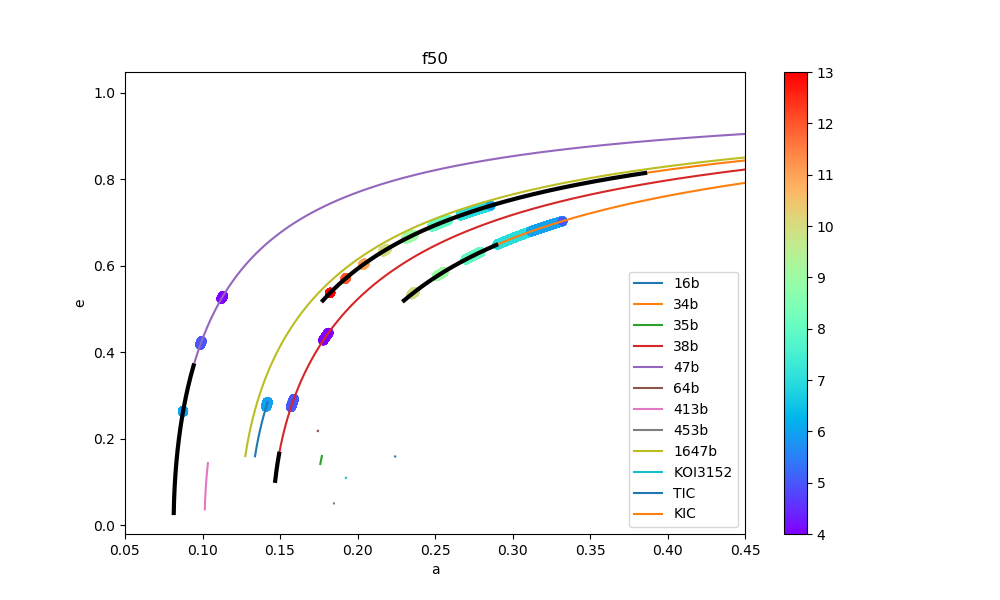

/home/adam/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


In [46]:
plt.figure(figsize=(10,6))
ftide = "f50"

cmin, cmax = 4, 13


for index, row in csv.iterrows():
    df = pd.read_pickle("/home/adam/Projects/tidal/"+ftide+"/"+row['Name']+".p")
    #df.chaos = df.chaos_05
    df.chaos = df.chaos_ep
    plt.plot(df.a,df.e,label=row['Name'])
    plt.scatter(df.a[df.chaos>2],df.e[df.chaos>2],c=df.chaos[df.chaos>2],label="",cmap="rainbow")
    plt.clim(cmin,cmax)
    
df1 = pd.read_pickle("/home/adam/Projects/tidal/"+ftide+"/"+"34b_evo"+".p")
df2 = pd.read_pickle("/home/adam/Projects/tidal/"+ftide+"/"+"38b_evo"+".p")
df3 = pd.read_pickle("/home/adam/Projects/tidal/"+ftide+"/"+"47b_evo"+".p")
df4 = pd.read_pickle("/home/adam/Projects/tidal/"+ftide+"/"+"KIC_evo"+".p")    

plt.plot(df1.a,df1.e,"k",lw=3,label="")
plt.plot(df2.a,df2.e,"k",lw=3,label="")
plt.plot(df3.a,df3.e,"k",lw=3,label="")
plt.plot(df4.a,df4.e,"k",lw=3,label="")
    
plt.title(ftide)
plt.legend(loc="best")
plt.ylabel("e")
plt.xlabel("a")
plt.xlim(0.05,.45)
plt.colorbar()
plt.show()